In [13]:
# !pip install gensim

In [2]:
!pip install konlpy

  Using cached konlpy-0.5.2-py2.py3-none-any.whl (19.4 MB)
  Using cached tweepy-3.9.0-py2.py3-none-any.whl (30 kB)
  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


In [3]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from konlpy.tag import Okt
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data=pd.read_csv('jeju_small_company3.csv',index_col=0)

In [5]:
lst = []
for text in data['text'][:10]:
    okt = Okt()
    text_nouns = okt.nouns(text)
    nouns_2 = [word for word in text_nouns if len(word) > 1]
    lst.append(nouns_2)

In [4]:
import gensim

dictionary = gensim.corpora.Dictionary(lst)
corpus = [dictionary.doc2bow(text) for text in lst]

In [5]:
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15,minimum_probability=0)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.020*"사업" + 0.013*"일보" + 0.010*"수출" + 0.010*"지원" + 0.010*"지역"')
(1, '0.066*"상무" + 0.036*"롯데" + 0.033*"전기차" + 0.022*"전무" + 0.017*"대표이사"')
(2, '0.021*"제주" + 0.021*"지역" + 0.018*"중소기업" + 0.012*"기업" + 0.010*"뉴시스"')
(3, '0.053*"면세점" + 0.019*"특허" + 0.017*"면세" + 0.014*"서울" + 0.014*"신규"')
(4, '0.020*"기업" + 0.019*"사업" + 0.019*"산업" + 0.018*"지원" + 0.016*"기술"')
(5, '0.024*"창업" + 0.020*"기업" + 0.015*"대표" + 0.014*"스타트업" + 0.014*"혁신"')
(6, '0.046*"규제" + 0.026*"특구" + 0.023*"자유" + 0.018*"지정" + 0.017*"계획"')
(7, '0.010*"사업" + 0.009*"기술" + 0.009*"한국" + 0.008*"에너지" + 0.008*"산업"')
(8, '0.030*"회장" + 0.024*"중소기업" + 0.020*"경제" + 0.016*"장관" + 0.016*"기업"')
(9, '0.010*"국민" + 0.010*"우리" + 0.010*"지금" + 0.009*"정부" + 0.008*"생각"')
(10, '0.026*"과장" + 0.020*"본부" + 0.020*"부장" + 0.015*"사업" + 0.014*"기획"')
(11, '0.035*"아세안" + 0.025*"대통령" + 0.021*"회의" + 0.018*"정상" + 0.011*"평화"')
(12, '0.015*"행사" + 0.014*"국내" + 0.010*"시장" + 0.010*"화장품" + 0.010*"제품"')
(13, '0.052*"은행" + 0.027*"지방" + 0.012*"지역" + 0.009*"시중" + 0.007*"광주"')
(

In [6]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.062513 -0.121486       1        1  10.751491
9      0.111354  0.210840       2        1  10.553048
10    -0.257391 -0.097296       3        1   9.370771
15     0.138136 -0.077052       4        1   7.558041
2      0.094461 -0.011988       5        1   7.411170
8      0.067492  0.109579       6        1   6.246400
6      0.046618 -0.059890       7        1   5.774879
5      0.071996 -0.055880       8        1   5.399733
12     0.026943 -0.005919       9        1   5.162977
0      0.035322 -0.089335      10        1   4.932321
14    -0.126110  0.169170      11        1   3.995404
17    -0.019351  0.009479      12        1   3.935880
7      0.067288 -0.021313      13        1   3.902689
19    -0.253153 -0.002839      14        1   3.220460
16     0.057764 -0.064859      15        1   3.021311
1     -0.209419  0.037258      16        1   2.238238
11     0.047838  0.224852      17        1   2.073724
13     0.087085  0.011646      18        1   1.922066
18     0.055626 -0.135265      19        1   1.281924
3     -0.105012 -0.029703      20        1   1.247478, topic_info=     Term         Freq        Total Category  logprob  loglift
1809   규제  3476.000000  3476.000000  Default  30.0000  30.0000
1392   은행  2473.000000  2473.000000  Default  29.0000  29.0000
1897   상무  1750.000000  1750.000000  Default  28.0000  28.0000
82     과장  2608.000000  2608.000000  Default  27.0000  27.0000
1465   지원  5889.000000  5889.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1215   기업    62.343311  8516.109375  Topic20  -5.3469  -0.5330
1200   광주    58.421528  2054.250244  Topic20  -5.4119   0.8241
2064  관계자    56.380257   797.315125  Topic20  -5.4475   1.7349
1507   투자    56.445679  2876.090332  Topic20  -5.4463   0.4531
1686   인천    56.304272  1265.632324  Topic20  -5.4488   1.2715

[1545 rows x 6 columns], token_table=       Topic      Freq Term
term                       
5767       1  0.812172   가공
5767       2  0.004343   가공
5767       8  0.078177   가공
5767      12  0.013029   가공
5767      13  0.091206   가공
...      ...       ...  ...
19325      5  0.934357  후유증
18645      3  0.965207   훈지
2457       8  0.990653   휴넷
21532     15  0.926936   휴업
23432     13  0.974722   흥덕

[6686 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 11, 16, 3, 9, 7, 6, 13, 1, 15, 18, 8, 20, 17, 2, 12, 14, 19, 4])

In [35]:
from collections import Counter
a = Counter([x for sublist in lst for x in sublist])
a.most_common(100)

[('기업', 8383),
 ('지역', 7815),
 ('사업', 7383),
 ('지원', 5984),
 ('중소기업', 5849),
 ('한국', 5690),
 ('제주', 5474),
 ('산업', 5417),
 ('경제', 4751),
 ('서울', 4094),
 ('정부', 3777),
 ('규제', 3686),
 ('위해', 3463),
 ('대표', 3459),
 ('기술', 3371),
 ('센터', 3165),
 ('정책', 3159),
 ('혁신', 3083),
 ('과장', 3036),
 ('뉴스', 2909),
 ('금융', 2878),
 ('통해', 2819),
 ('장관', 2778),
 ('계획', 2701),
 ('투자', 2684),
 ('사회', 2631),
 ('운영', 2548),
 ('회장', 2547),
 ('위원회', 2523),
 ('시장', 2437),
 ('은행', 2415),
 ('대한', 2387),
 ('서비스', 2321),
 ('대상', 2280),
 ('중소', 2271),
 ('추진', 2271),
 ('부장', 2258),
 ('관리', 2242),
 ('개발', 2238),
 ('벤처기업', 2199),
 ('국내', 2175),
 ('본부', 2164),
 ('부산', 2142),
 ('올해', 2110),
 ('자유', 2052),
 ('확대', 2034),
 ('관련', 2018),
 ('이번', 1967),
 ('지난', 1958),
 ('네이버', 1920),
 ('창업', 1917),
 ('우리', 1916),
 ('협력', 1865),
 ('광주', 1851),
 ('선정', 1796),
 ('전국', 1791),
 ('진행', 1749),
 ('대해', 1746),
 ('특구', 1740),
 ('문제', 1739),
 ('제공', 1731),
 ('성장', 1701),
 ('참여', 1693),
 ('교육', 1686),
 ('기획', 1682),
 ('일자리', 1672),
 (

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-36-b5faac2516ee>:3: DeprecationWarning: invalid escape sequence \W
  wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)


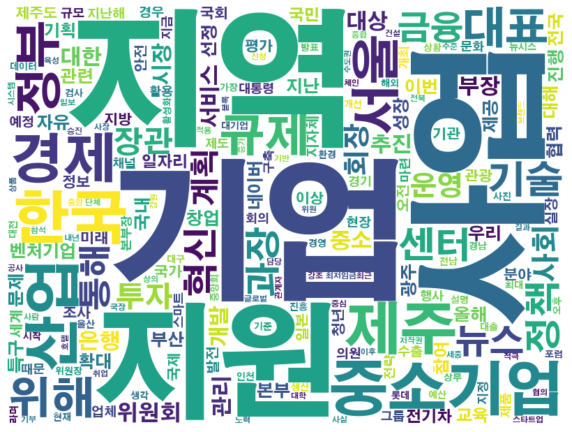

In [36]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(a)
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2020

In [37]:
data=pd.read_csv('jeju_small_company_2020.csv',index_col=0)

In [38]:
data

,title,text,date,link
0,['2020'중소기업우수제품]유니크미 '렌느 와일드진생 스킨케어',유니크미 렌느 와일드진생 스킨케어유니크미(대표 곽희옥)는 제주 발효연구소에서 깨끗한...,2020.07.31,https://news.naver.com/main/read.nhn?mode=LSD&...
1,"4D, 빅데이터 기반 건설사업관리 서비스 제공",[2020 대한민국 가치경영 대상] (주)제호바국내외 국가 기반시설 공정관리 실적 ...,2020.07.31,https://news.naver.com/main/read.nhn?mode=LSD&...
2,"제주맥주, 상반기 매출 148억 돌파하며 작년 연 매출 추월",제주맥주가 올해 상반기(1~6월) 매출 148억을 달성하며 작년 연 매출을 뛰어넘었...,2020.07.30,https://news.naver.com/main/read.nhn?mode=LSD&...
3,[능력중심 제주 만들기]기술력으로 취업률 35%…해외 취업도,제주 유일 순수 공업계 특성화고 '한림공업고등학교'2019년 뉴질랜드 현장학습 7명...,2020.07.30,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"제주맥주, 올 상반기 1초에 1병씩 팔렸다",[파이낸셜뉴스] 제주맥주는 올해 상반기 매출 148억을 달성하며 지난해 연 매출을...,2020.07.30,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...
971,항공·정유업계 신용도 줄하락… 국내 기업 신용등급 ‘초비상’,대한항공ㆍ한진칼 등급 “하향 검토”항공ㆍ정유 이외 산업 전반 확산 조짐 “업종보다 ...,2020.04.03,https://news.naver.com/main/read.nhn?mode=LSD&...
972,제조업 11년前으로… `공포의 死월`,주요 대기업 유동성 확보 나서자산매각에 사업 구조조정까지BSI 57 불과… '금융위...,2020.04.02,https://news.naver.com/main/read.nhn?mode=LSD&...
973,"제주 제조업체 깊은 한숨…""IMF만큼 어렵다""","제주상의, 2분기 경기전망 발표…21년만에 최저치조사업체 절반 이상 ""당초보다 고용...",2020.04.02,https://news.naver.com/main/read.nhn?mode=LSD&...
974,민주당 총선 유세 시작…'동분서주' 이낙연 대책 마련도,"이낙연 0시 종로 '개문' 유세…""희망 메시지""민주·더시민 공동 출정식 ""1번·5번...",2020.04.02,https://news.naver.com/main/read.nhn?mode=LSD&...


In [39]:
lst = []
for text in data['text']:
    okt = Okt()
    text_nouns = okt.nouns(text)
    nouns_2 = [word for word in text_nouns if len(word) > 1]
    lst.append(nouns_2)

In [40]:
import gensim

dictionary = gensim.corpora.Dictionary(lst)
corpus = [dictionary.doc2bow(text) for text in lst]

In [41]:
NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15,minimum_probability=0)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.009*"코로나" + 0.008*"제주" + 0.007*"서울" + 0.006*"위원회" + 0.006*"방송"')
(1, '0.018*"사업" + 0.017*"풍력" + 0.016*"해상" + 0.011*"충전" + 0.010*"두산"')
(2, '0.015*"지원" + 0.015*"기업" + 0.014*"사업" + 0.013*"제주" + 0.009*"기술"')
(3, '0.010*"협동조합" + 0.010*"지원" + 0.008*"중소기업" + 0.008*"지자체" + 0.006*"울산"')
(4, '0.008*"통합" + 0.007*"민주당" + 0.007*"우리" + 0.006*"사람" + 0.006*"의원"')
(5, '0.025*"이스타항공" + 0.016*"의원" + 0.009*"로컬" + 0.008*"스타" + 0.008*"제주항공"')
(6, '0.014*"코로나" + 0.009*"한국" + 0.009*"지원" + 0.008*"지역" + 0.008*"산업"')
(7, '0.022*"은행" + 0.016*"금융" + 0.014*"코로나" + 0.012*"대출" + 0.011*"기업"')
(8, '0.011*"보증" + 0.009*"코로나" + 0.008*"펌프" + 0.006*"대출" + 0.006*"신용"')
(9, '0.033*"매출" + 0.024*"시장" + 0.020*"감소" + 0.019*"코로나" + 0.018*"전통"')


In [42]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.068532 -0.094307       1        1  16.754570
7      0.065763  0.066423       2        1  13.015707
6      0.041205 -0.002883       3        1  12.606126
9      0.183501  0.163571       4        1  11.809580
4     -0.161809  0.002668       5        1  11.772052
1      0.052956 -0.184154       6        1  10.573900
5     -0.139318  0.050463       7        1   8.301263
8     -0.022948 -0.008256       8        1   7.312472
0     -0.114316  0.077783       9        1   4.594511
3      0.026436 -0.071309      10        1   3.259829, topic_info=       Term         Freq        Total Category  logprob  loglift
284      매출  1410.000000  1410.000000  Default  30.0000  30.0000
2243  이스타항공   665.000000   665.000000  Default  29.0000  29.0000
1903     은행   915.000000   915.000000  Default  28.0000  28.0000
775      감소   830.000000   830.000000  Default  27.0000  27.0000
1077     풍력   559.000000   559.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
441      기업    39.642933  1865.152100  Topic10  -5.5172  -0.4277
8        기술    34.137768   936.675781  Topic10  -5.6667   0.1116
10      네이버    31.456543   607.702209  Topic10  -5.7485   0.4624
106      뉴스    31.762278   874.443542  Topic10  -5.7388   0.1082
914     코로나    33.420177  2613.299561  Topic10  -5.6880  -0.9357

[765 rows x 6 columns], token_table=       Topic      Freq Term
term                       
10479      2  0.947087   가계
10479      8  0.025597   가계
365        1  0.061924   가구
365        2  0.008846   가구
365        3  0.132693   가구
...      ...       ...  ...
932        9  0.033114   휴가
932       10  0.011038   휴가
3808       7  0.044068   휴지
3808       8  0.925431   휴지
12342      8  0.918354  휴지통

[2648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 7, 10, 5, 2, 6, 9, 1, 4])

In [43]:
from collections import Counter
a = Counter([x for sublist in lst for x in sublist])
a.most_common(100)

[('코로나', 2743),
 ('지원', 2237),
 ('지역', 1997),
 ('기업', 1937),
 ('사업', 1801),
 ('제주', 1762),
 ('매출', 1455),
 ('시장', 1449),
 ('중소기업', 1261),
 ('서울', 1192),
 ('정부', 1184),
 ('경제', 1176),
 ('산업', 1118),
 ('위해', 1057),
 ('한국', 991),
 ('통해', 983),
 ('기술', 973),
 ('은행', 959),
 ('지난', 939),
 ('국내', 930),
 ('뉴스', 918),
 ('감소', 856),
 ('공인', 789),
 ('대표', 771),
 ('금융', 766),
 ('소상', 763),
 ('전통', 728),
 ('판매', 718),
 ('이번', 716),
 ('진행', 715),
 ('이스타항공', 715),
 ('서비스', 714),
 ('센터', 713),
 ('중소', 702),
 ('개발', 699),
 ('대출', 691),
 ('의원', 691),
 ('조사', 688),
 ('대상', 687),
 ('계획', 674),
 ('대한', 661),
 ('벤처기업', 655),
 ('정책', 651),
 ('네이버', 637),
 ('운영', 637),
 ('상공', 625),
 ('관련', 616),
 ('참여', 615),
 ('전국', 611),
 ('제공', 605),
 ('확대', 601),
 ('행사', 596),
 ('풍력', 590),
 ('부산', 566),
 ('제품', 564),
 ('투자', 563),
 ('제주도', 562),
 ('상황', 560),
 ('이후', 557),
 ('규모', 551),
 ('선정', 547),
 ('대비', 544),
 ('이상', 540),
 ('해상', 538),
 ('사회', 537),
 ('최대', 529),
 ('우리', 516),
 ('지난해', 511),
 ('상품', 511),
 ('경기', 

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-44-b5faac2516ee>:3: DeprecationWarning: invalid escape sequence \W
  wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)


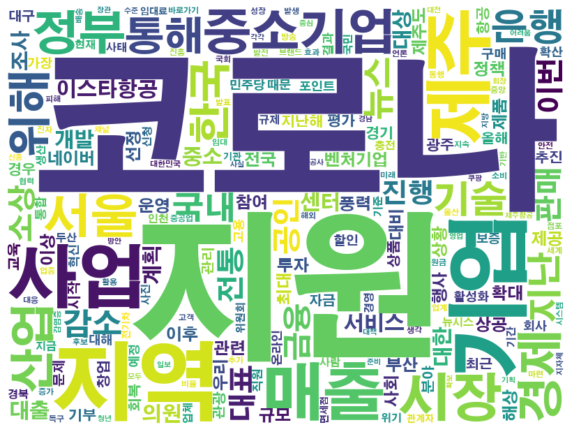

In [44]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(a)
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 제주 수출기업 2019

In [45]:
data=pd.read_csv('jeju_export_company_2019.csv',index_col=0)
data

,title,text,date,link
0,5대 그룹 총수 여름휴가 반납...비상경영전략 수립 집중,"(왼쪽) 삼성전자 이재용 부회장과 SK그룹 최태원 회장. 제공 I 삼성전자, 대한상...",2019.07.30,https://news.naver.com/main/read.nhn?mode=LSD&...
1,저금리 시대 재테크 新 풍속도… 저축은행 고금리 상품·부동산 사모펀드 인기,장기간 지속되는 저금리와 미중 무역전쟁이 국내 재테크 지형을 송두리째 바꿔놓고 있다...,2019.07.30,https://news.naver.com/main/read.nhn?mode=LSD&...
2,휴가잊고 집무실 지키는 文대통령…공식일정 비운채 日대응 몰두(종합),日경제보복 조치 보고받고 '화이트리스트 韓배제' 대책 마련 고심靑 일부 참모 및 장...,2019.07.29,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"문 대통령, 오늘 정상 출근…日수출규제 등 현안 대응 고심",당초 계획한 이번주 닷새 동안의 여름 휴가를 취소한 문재인 대통령은 오늘(29일)...,2019.07.29,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"SK, '반도체 살려라' 총력전…고순도 불화수소 자체 생산 착수","계열사 SK머티리얼즈 이르면 연내 샘플 공급 목표로 개발하이닉스 경영진 일본행, 한...",2019.07.26,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...
163,"""혁명적 산업구조 재편 없다면 제주도 빈곤 악순환 빠져""","“제주 경제에 낙수효과 있었는지 의문, 계속 어려웠다”“산업구조 편중 해소해야, 투...",2019.01.04,https://news.naver.com/main/read.nhn?mode=LSD&...
164,세계에서 가장 불안정한 지역이 된 중동…왜 그럴까?,"[중동, 어디까지 아니?] ⑧사이크스-피코 비밀 협정은 무엇인가?[박찬기 전 명지대...",2019.01.04,https://news.naver.com/main/read.nhn?mode=LSD&...
165,[J노믹스 J턴하라] 경제 원로 진념 前 부총리에게 듣는다,"""우리 경제 어렵지만 잠재력 충분, 기업은 투명경영, 노조는 상생하라""80년대에 머...",2019.01.02,https://news.naver.com/main/read.nhn?mode=LSD&...
166,"제주도, 지역주도 청년 일자리 420개 창출",제주도청 전경.제주도는 지역주도형 청년 일자리 사업에 106억원을 투입해 420개의...,2019.01.01,https://news.naver.com/main/read.nhn?mode=LSD&...


In [46]:
lst = []
for text in data['text']:
    okt = Okt()
    text_nouns = okt.nouns(text)
    nouns_2 = [word for word in text_nouns if len(word) > 1]
    lst.append(nouns_2)
import gensim

dictionary = gensim.corpora.Dictionary(lst)
corpus = [dictionary.doc2bow(text) for text in lst]
NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15,minimum_probability=0)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.021*"일보" + 0.012*"기업" + 0.008*"회장" + 0.007*"제주" + 0.007*"경제"')
(1, '0.020*"방송" + 0.020*"미국" + 0.016*"텔레콤" + 0.014*"기술" + 0.013*"미디어"')
(2, '0.020*"수출" + 0.012*"지원" + 0.010*"기업" + 0.010*"사업" + 0.009*"지역"')
(3, '0.034*"일본" + 0.015*"한국" + 0.010*"정부" + 0.008*"수출" + 0.007*"우리"')
(4, '0.079*"검사" + 0.023*"과장" + 0.018*"지청" + 0.008*"전보" + 0.008*"부장"')
(5, '0.021*"기업" + 0.020*"제주" + 0.015*"수출" + 0.012*"지원" + 0.012*"사업"')
(6, '0.023*"기업" + 0.021*"회장" + 0.018*"규제" + 0.015*"경제" + 0.011*"상의"')
(7, '0.015*"기업" + 0.012*"수출" + 0.012*"오후" + 0.011*"광주" + 0.010*"사회"')
(8, '0.015*"휴가" + 0.012*"일본" + 0.011*"수출" + 0.010*"경제" + 0.007*"회장"')
(9, '0.011*"금융" + 0.008*"대출" + 0.008*"산업" + 0.007*"은행" + 0.006*"기업"')


In [47]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.351896 -0.036496       1        1  15.313270
6     -0.107029 -0.073219       2        1  15.263724
5     -0.032137  0.167857       3        1  14.886772
0     -0.067725 -0.113821       4        1  13.638263
2     -0.008935  0.108093       5        1  13.278741
9      0.000180  0.105297       6        1   7.721472
7     -0.046492  0.039883       7        1   7.575723
1     -0.041320 -0.047700       8        1   6.037776
8     -0.030551 -0.066413       9        1   3.394465
3     -0.017887 -0.083481      10        1   2.889797, topic_info=     Term        Freq       Total Category  logprob  loglift
3641   검사  793.000000  793.000000  Default  30.0000  30.0000
133    일본  233.000000  233.000000  Default  29.0000  29.0000
2294   과장  233.000000  233.000000  Default  28.0000  28.0000
3709   지청  174.000000  174.000000  Default  27.0000  27.0000
1165   일보  199.000000  199.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
232    관리    7.058475  105.682259  Topic10  -5.5729   0.8378
141    전략    6.551926   79.825691  Topic10  -5.6474   1.0439
42     기업    7.495569  775.824158  Topic10  -5.5128  -1.0956
159    지난    5.829556  130.100327  Topic10  -5.7642   0.4386
35     규제    5.869446  264.695892  Topic10  -5.7574  -0.2648

[713 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5621      6  0.773709     가계
0         9  0.864355     가기
3045      5  0.882142    가덕도
5406      7  0.703137     가루
1643      2  0.900044     가면
...     ...       ...    ...
200       8  0.028230     휴가
200       9  0.931585     휴가
201       9  0.864351     휴식
5383      3  0.954406  히든챔피언
7722      6  0.928697     힐스

[1889 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 1, 3, 10, 8, 2, 9, 4])

In [48]:
from collections import Counter
a = Counter([x for sublist in lst for x in sublist])
a.most_common(100)

[('검사', 864),
 ('기업', 860),
 ('수출', 651),
 ('제주', 465),
 ('경제', 416),
 ('사업', 377),
 ('지원', 352),
 ('한국', 346),
 ('회장', 335),
 ('지역', 313),
 ('규제', 295),
 ('일본', 285),
 ('시장', 275),
 ('과장', 254),
 ('해외', 249),
 ('산업', 249),
 ('기술', 237),
 ('중소기업', 236),
 ('정부', 229),
 ('일보', 219),
 ('위해', 203),
 ('정책', 189),
 ('지청', 189),
 ('투자', 188),
 ('뉴스', 183),
 ('개발', 166),
 ('광주', 166),
 ('국가', 164),
 ('통해', 163),
 ('상의', 161),
 ('일자리', 159),
 ('혁신', 158),
 ('미국', 157),
 ('센터', 153),
 ('추진', 152),
 ('세계', 151),
 ('지난', 147),
 ('우리', 146),
 ('국내', 139),
 ('대한', 138),
 ('서울', 135),
 ('이번', 135),
 ('대표', 134),
 ('사회', 133),
 ('호텔', 133),
 ('포럼', 132),
 ('올해', 131),
 ('금융', 131),
 ('본부', 131),
 ('계획', 127),
 ('관련', 126),
 ('문제', 126),
 ('미래', 126),
 ('제공', 124),
 ('네이버', 119),
 ('관리', 118),
 ('대해', 116),
 ('협력', 114),
 ('성장', 113),
 ('부산', 113),
 ('대응', 112),
 ('확대', 109),
 ('대구', 108),
 ('서비스', 106),
 ('장관', 106),
 ('방송', 106),
 ('기획', 104),
 ('지금', 103),
 ('상황', 102),
 ('부장', 102),
 ('진행', 102),
 

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-49-b5faac2516ee>:3: DeprecationWarning: invalid escape sequence \W
  wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)


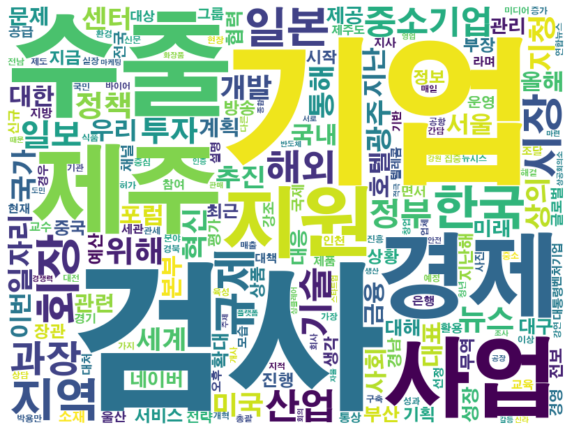

In [49]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(font_path='C:\Windows\Fonts/H2GTRE.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(a)
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()